---
title: "empirical confidence interval"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Not always we want to compute the confidence interval of the mean. Sometimes we are interested in a different statistic, such as the median, the standard deviation, or the maximum. The equations we saw before for the confidence interval of the mean do not apply to these statistics. However, we can still compute a confidence interval for them using the empirical bootstrap method.

## bootstrap confidence interval

1. Draw a sample of size $N$ from the population. Let's assume you made an experiment and you could only afford to collect $N$ samples. You will not have the opportunity to collect more samples, and that's all you have available.
1. Assume that the sample is representative of the population. This is a strong assumption, but we will use it to compute the confidence interval.
1. From this original sample, draw $B$ bootstrap samples of size $N$ with replacement. This means that you will randomly select $N$ samples from the original sample, allowing for duplicates. This is like drawing pieces of paper from a hat, where you can put the paper back after drawing it.
1. For each bootstrap sample, compute the statistic of interest (e.g., median, standard deviation, maximum).
1. Compute the cdf of the bootstrap statistics. This will give you the empirical distribution of the statistic.
1. Compute the confidence interval using the empirical distribution. For a 95% confidence interval, you can take the 2.5th and 97.5th percentiles of the bootstrap statistics.

That's it. Now let's do it in code.

## question

We have a sample of 30 7-year-old boys. What can we say about the maximum height of 7-year-olds in the general population?

In [1]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
from scipy.stats import norm, ttest_ind, t
import scipy
# %matplotlib widget

In [2]:
#| code-summary: "load data"
df_boys = pd.read_csv('../archive/data/height/boys_height_stats.csv', index_col=0)
mu_boys = df_boys.loc[7.0, 'mu']
sigma_boys = df_boys.loc[7.0, 'sigma']

In [24]:
#| code-summary: "bootstrap method"
#| code-fold: false
N = 100
B = 10000
sample = norm.rvs(size=N, loc=mu_boys, scale=sigma_boys)
median_list = []
for i in range(B):
    sample_bootstrap = np.random.choice(sample, size=N, replace=True)
    median_list.append(np.median(sample_bootstrap))
median_list = np.array(median_list)

alpha = 0.05
ci_bottom = np.quantile(median_list,alpha/2)
ci_top = np.quantile(median_list, 1-alpha/2)
print(f"Bootstrap CI for median: {ci_bottom:.2f} - {ci_top:.2f} cm")

Bootstrap CI for median: 121.19 - 123.63 cm


[Text(0, 0.5, 'cdf'), Text(0.5, 0, 'height (cm)')]

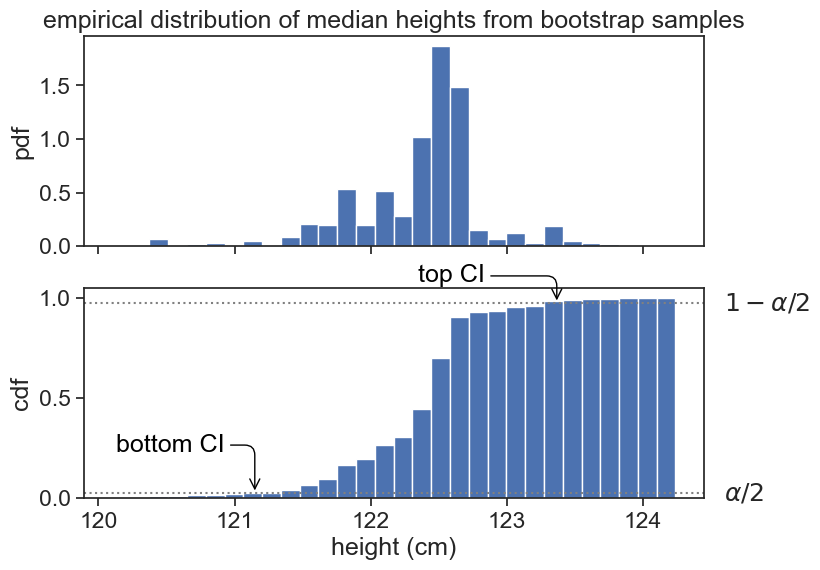

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8, 6), sharex=True)
ax[0].hist(median_list, bins=30, density=True, align='mid')
ax[1].hist(median_list, bins=30, density=True, cumulative=True, align='mid')

ax[1].axhline(alpha/2, color='gray', linestyle=':')
ax[1].axhline(1-alpha/2, color='gray', linestyle=':')

xlim = ax[1].get_xlim()
ax[1].text(xlim[1]+0.15, alpha/2, r"$\alpha/2$",
           ha="left", va="center")
ax[1].text(xlim[1]+0.15, 1-alpha/2, r"$1-\alpha/2$",
           ha="left", va="center")

ax[1].annotate(
     'bottom CI',
     xy=(ci_bottom, alpha/2), xycoords='data',
     xytext=(-100, 30), textcoords='offset points',
     color='black',
     arrowprops=dict(arrowstyle="->", color='black',
                     connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax[1].annotate(
     'top CI',
     xy=(ci_top, 1-alpha/2), xycoords='data',
     xytext=(-100, 15), textcoords='offset points',
     color='black',
     arrowprops=dict(arrowstyle="->", color='black',
                     connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax[0].set(ylabel="pdf",
          title="empirical distribution of median heights from bootstrap samples")
ax[1].set(ylabel="cdf",
          xlabel="height (cm)")

Clearly, the distribution of median height is not normal. The bootstrap method gives us a way to compute the confidence interval of the median height (or any other statistic of your choosing) without assuming normality.